In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import h5py
import torch
from tqdm.auto import tqdm

import warnings
warnings.filterwarnings('ignore')

import matplotlib
import matplotlib.pyplot as plt
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
np.set_printoptions(precision=2, suppress=False)

import cv2
import pygmsh
import os

spatial_scale = 1e3

# Arizona, Maricopa

(548, 685) (177, 2)


Warning: DOLFIN XML is a legacy format. Consider using XDMF instead.

Warning: DOLFIN XML can only handle one cell type at a time. Using triangle, discarding 
vertex, line.

<meshio mesh object>
  Number of points: 4216
  Number of cells:
    line: 293
    triangle: 8137
    vertex: 177


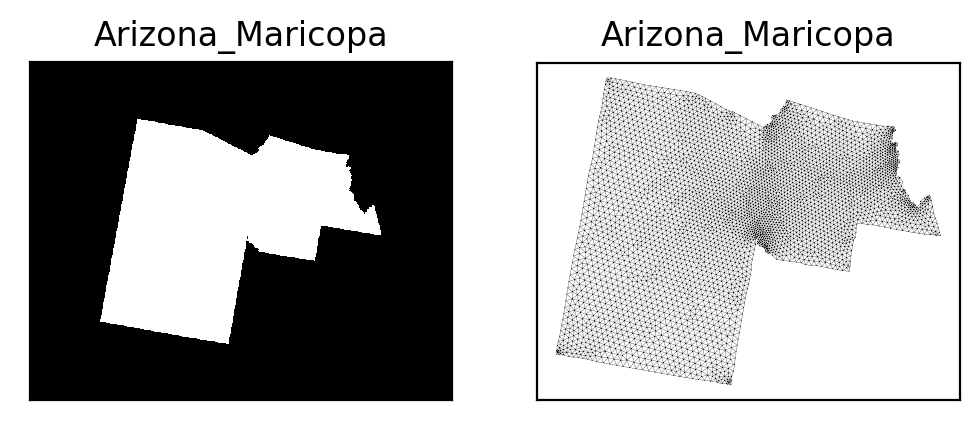

In [91]:
county = 'Arizona_Maricopa'

save_path = f'yearly/processed/{county}_mesh.xml'
load_path = f'yearly/processed/{county}.hdf5'

with h5py.File(load_path, 'r') as h5f:
    d = h5f['2010']
    mask = d['mask'][:].astype(bool)
    x_grid = d['x_grid'][:] / spatial_scale
    y_grid = d['y_grid'][:] / spatial_scale
    
    mask_float = np.zeros(mask.shape, dtype=np.uint8)
    mask_float[mask] = 255
    contours, _ = cv2.findContours(mask_float, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)

    '''
    countours is a list of lists -- you can change the index below here to get 
        different contours to choose as the mesh.
    '''
    idx = np.argmax([contours[i].squeeze().shape[0] for i in range(len(contours))])
    polygon = contours[idx].squeeze()
    print(mask.shape, polygon.shape)
    pos_x = x_grid[polygon[:, 1], polygon[:, 0]]
    pos_y = y_grid[polygon[:, 1], polygon[:, 0]]

    with pygmsh.geo.Geometry() as geom:
        geom.add_polygon(np.stack([pos_x, pos_y], axis=-1), mesh_size=4)
        mesh = geom.generate_mesh(dim=2, verbose=True)
    mesh.points = mesh.points[:, :2]
    mesh.write(save_path)
    
    print(mesh)
    
fig, ax = plt.subplots(1, 2, dpi=200)
ax[0].pcolormesh(x_grid, y_grid, mask, cmap='Greys_r')
ax[1].triplot(mesh.points[:, 0], mesh.points[:, 1], mesh.cells[1].data,
              color='black', linewidth=0.1)

for a in ax:
    a.set(xticks=[], yticks=[], title=county, aspect='equal');


In [93]:
from data_processing import *
from yearly_pbnn import *

dataset = YearlyDataset(county)
print('Loaded dataset', flush=True)

model = SourcedOnlyPBNN()
model.training_step(dataset[0])

Building dataset with constant housing in time
Loaded dataset


({'Si': tensor([ 0.0045,  0.0062,  0.0051,  ..., -0.0422, -0.0451, -0.0403],
         grad_fn=<ReshapeAliasBackward0>)},
 52.81802352186738)

# California, Alameda

(194, 199) (107, 2)


Warning: DOLFIN XML is a legacy format. Consider using XDMF instead.

Warning: DOLFIN XML can only handle one cell type at a time. Using triangle, discarding 
vertex, line.

<meshio mesh object>
  Number of points: 746
  Number of cells:
    line: 124
    triangle: 1366
    vertex: 107


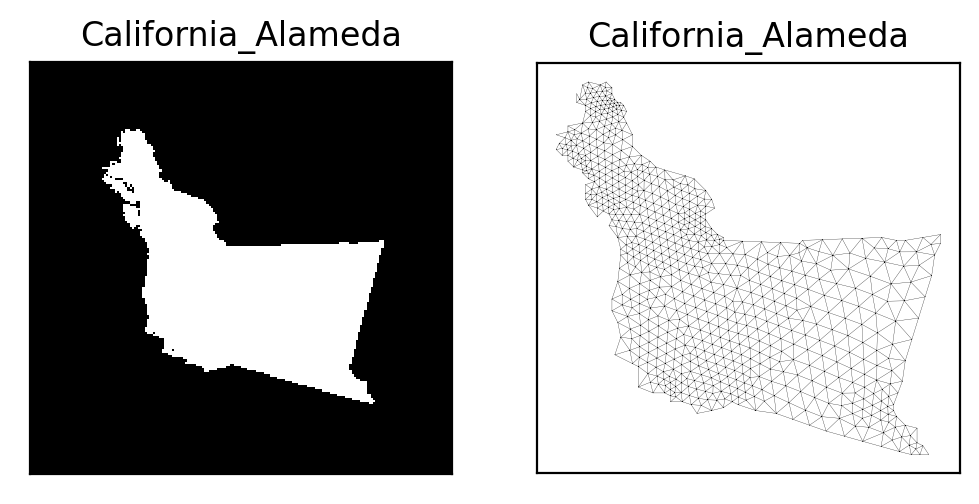

In [94]:
county = 'California_Alameda'

save_path = f'yearly/processed/{county}_mesh.xml'
load_path = f'yearly/processed/{county}.hdf5'

with h5py.File(load_path, 'r') as h5f:
    d = h5f['2010']
    mask = d['mask'][:].astype(bool)
    x_grid = d['x_grid'][:] / spatial_scale
    y_grid = d['y_grid'][:] / spatial_scale
    
    mask_float = np.zeros(mask.shape, dtype=np.uint8)
    mask_float[mask] = 255
    contours, _ = cv2.findContours(mask_float, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)

    '''
    countours is a list of lists -- you can change the index below here to get 
        different contours to choose as the mesh.
    '''
    idx = np.argmax([contours[i].squeeze().shape[0] for i in range(len(contours))])
    polygon = contours[idx].squeeze()
    print(mask.shape, polygon.shape)
    pos_x = x_grid[polygon[:, 1], polygon[:, 0]]
    pos_y = y_grid[polygon[:, 1], polygon[:, 0]]

    with pygmsh.geo.Geometry() as geom:
        geom.add_polygon(np.stack([pos_x, pos_y], axis=-1), mesh_size=4)
        mesh = geom.generate_mesh(dim=2, verbose=True)
    mesh.points = mesh.points[:, :2]
    mesh.write(save_path)
    
    print(mesh)
    
fig, ax = plt.subplots(1, 2, dpi=200)
ax[0].pcolormesh(x_grid, y_grid, mask, cmap='Greys_r')
ax[1].triplot(mesh.points[:, 0], mesh.points[:, 1], mesh.cells[1].data,
              color='black', linewidth=0.1)

for a in ax:
    a.set(xticks=[], yticks=[], title=county, aspect='equal');


In [95]:
from data_processing import *
from yearly_pbnn import *

dataset = YearlyDataset(county)
print('Loaded dataset', flush=True)

model = SourcedOnlyPBNN()
model.training_step(dataset[0])

Building dataset with constant housing in time
Loaded dataset


({'Si': tensor([-0.2347, -0.2142, -0.2192,  ...,  0.0535,  0.0533,  0.0473],
         grad_fn=<ReshapeAliasBackward0>)},
 41.949701091093246)

# California, Contra Costa

(131, 226) (131, 2)


Warning: DOLFIN XML is a legacy format. Consider using XDMF instead.

Warning: DOLFIN XML can only handle one cell type at a time. Using triangle, discarding 
vertex, line.

<meshio mesh object>
  Number of points: 988
  Number of cells:
    line: 141
    triangle: 1833
    vertex: 131


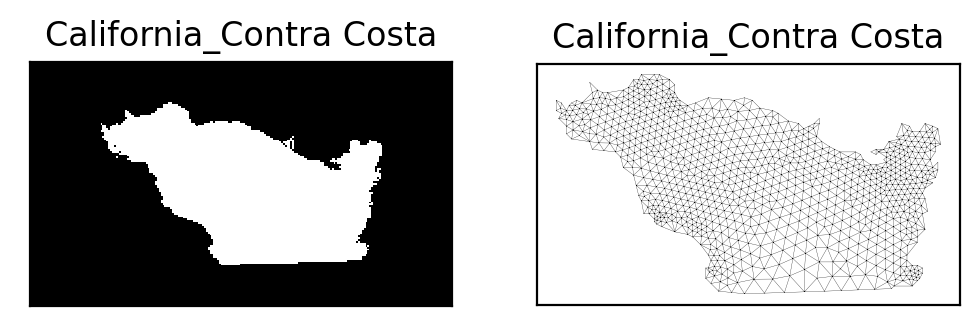

In [96]:
county = 'California_Contra Costa'

save_path = f'yearly/processed/{county}_mesh.xml'
load_path = f'yearly/processed/{county}.hdf5'

with h5py.File(load_path, 'r') as h5f:
    d = h5f['2010']
    mask = d['mask'][:].astype(bool)
    x_grid = d['x_grid'][:] / spatial_scale
    y_grid = d['y_grid'][:] / spatial_scale
    
    mask_float = np.zeros(mask.shape, dtype=np.uint8)
    mask_float[mask] = 255
    contours, _ = cv2.findContours(mask_float, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)

    '''
    countours is a list of lists -- you can change the index below here to get 
        different contours to choose as the mesh.
    '''
    idx = np.argmax([contours[i].squeeze().shape[0] for i in range(len(contours))])
    polygon = contours[idx].squeeze()
    print(mask.shape, polygon.shape)
    pos_x = x_grid[polygon[:, 1], polygon[:, 0]]
    pos_y = y_grid[polygon[:, 1], polygon[:, 0]]

    with pygmsh.geo.Geometry() as geom:
        geom.add_polygon(np.stack([pos_x, pos_y], axis=-1), mesh_size=4)
        mesh = geom.generate_mesh(dim=2, verbose=True)
    mesh.points = mesh.points[:, :2]
    mesh.write(save_path)
    
    print(mesh)
    
fig, ax = plt.subplots(1, 2, dpi=200)
ax[0].pcolormesh(x_grid, y_grid, mask, cmap='Greys_r')
ax[1].triplot(mesh.points[:, 0], mesh.points[:, 1], mesh.cells[1].data,
              color='black', linewidth=0.1)

for a in ax:
    a.set(xticks=[], yticks=[], title=county, aspect='equal');


In [97]:
from data_processing import *
from yearly_pbnn import *

dataset = YearlyDataset(county)
print('Loaded dataset', flush=True)

model = SourcedOnlyPBNN()
model.training_step(dataset[0])

Building dataset with constant housing in time
Loaded dataset


({'Si': tensor([-0.1107, -0.1109, -0.1152,  ...,  0.0173,  0.0168,  0.0233],
         grad_fn=<ReshapeAliasBackward0>)},
 39.14013806682381)

# California, Los Angeles

(688, 401) (165, 2)


Warning: DOLFIN XML is a legacy format. Consider using XDMF instead.

Warning: DOLFIN XML can only handle one cell type at a time. Using triangle, discarding 
vertex, line.

<meshio mesh object>
  Number of points: 2321
  Number of cells:
    line: 214
    triangle: 4426
    vertex: 165


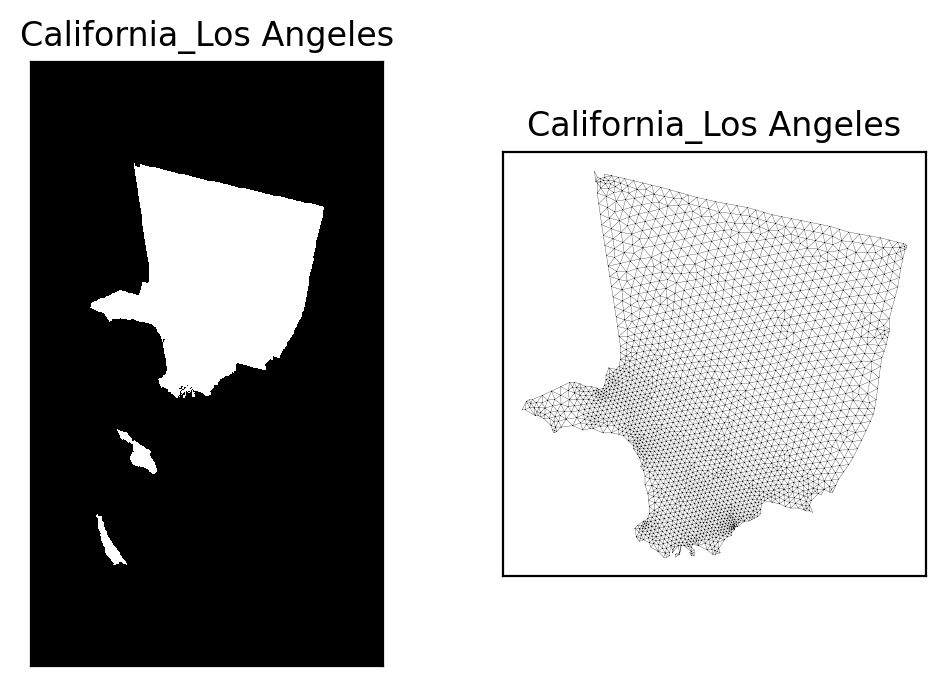

In [110]:
county = 'California_Los Angeles'

save_path = f'yearly/processed/{county}_mesh.xml'
load_path = f'yearly/processed/{county}.hdf5'

with h5py.File(load_path, 'r') as h5f:
    d = h5f['2010']
    mask = d['mask'][:].astype(bool)
    x_grid = d['x_grid'][:] / spatial_scale
    y_grid = d['y_grid'][:] / spatial_scale
    
    mask_float = np.zeros(mask.shape, dtype=np.uint8)
    mask_float[mask] = 255
    contours, _ = cv2.findContours(mask_float, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)

    '''
    countours is a list of lists -- you can change the index below here to get 
        different contours to choose as the mesh.
    '''
    idx = np.argmax([contours[i].squeeze().shape[0] for i in range(len(contours))])
    polygon = contours[idx].squeeze()
    print(mask.shape, polygon.shape)
    pos_x = x_grid[polygon[:, 1], polygon[:, 0]]
    pos_y = y_grid[polygon[:, 1], polygon[:, 0]]

    with pygmsh.geo.Geometry() as geom:
        geom.add_polygon(np.stack([pos_x, pos_y], axis=-1), mesh_size=4)
        mesh = geom.generate_mesh(dim=2, verbose=True)
    mesh.points = mesh.points[:, :2]
    mesh.write(save_path)
    
    print(mesh)
    
fig, ax = plt.subplots(1, 2, dpi=200)
ax[0].pcolormesh(x_grid, y_grid, mask, cmap='Greys_r')
ax[1].triplot(mesh.points[:, 0], mesh.points[:, 1], mesh.cells[1].data,
              color='black', linewidth=0.1)

for a in ax:
    a.set(xticks=[], yticks=[], title=county, aspect='equal');


In [111]:
from data_processing import *
from yearly_pbnn import *

dataset = YearlyDataset(county)
print('Loaded dataset', flush=True)

model = SourcedOnlyPBNN()
model.training_step(dataset[0])

Building dataset with constant housing in time
Loaded dataset


({'Si': tensor([-0.0663, -0.0669, -0.0629,  ..., -0.0535, -0.0571, -0.0567],
         grad_fn=<ReshapeAliasBackward0>)},
 55.053734417305975)

# California, Orange (CREATES NaN, Fix or do not use)

(207, 183) (94, 2)


Warning: DOLFIN XML is a legacy format. Consider using XDMF instead.

Warning: DOLFIN XML can only handle one cell type at a time. Using triangle, discarding 
vertex, line.

<meshio mesh object>
  Number of points: 751
  Number of cells:
    line: 105
    triangle: 1395
    vertex: 94


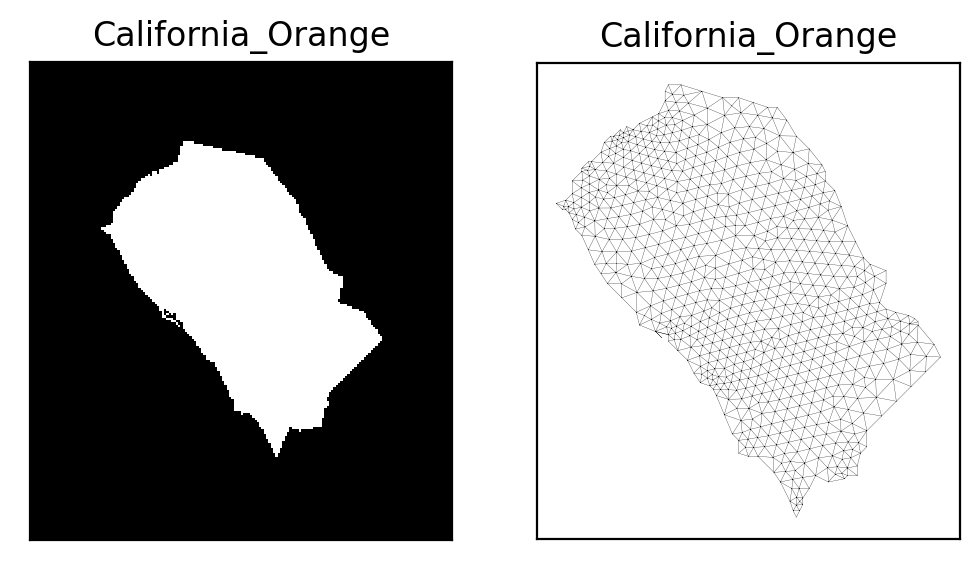

In [104]:
county = 'California_Orange'

save_path = f'yearly/processed/{county}_mesh.xml'
load_path = f'yearly/processed/{county}.hdf5'

with h5py.File(load_path, 'r') as h5f:
    d = h5f['2010']
    mask = d['mask'][:].astype(bool)
    x_grid = d['x_grid'][:] / spatial_scale
    y_grid = d['y_grid'][:] / spatial_scale
    
    mask_float = np.zeros(mask.shape, dtype=np.uint8)
    mask_float[mask] = 255
    contours, _ = cv2.findContours(mask_float, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)

    '''
    countours is a list of lists -- you can change the index below here to get 
        different contours to choose as the mesh.
    '''
    idx = np.argmax([contours[i].squeeze().shape[0] for i in range(len(contours))])
    polygon = contours[idx].squeeze()
    print(mask.shape, polygon.shape)
    pos_x = x_grid[polygon[:, 1], polygon[:, 0]]
    pos_y = y_grid[polygon[:, 1], polygon[:, 0]]

    with pygmsh.geo.Geometry() as geom:
        geom.add_polygon(np.stack([pos_x, pos_y], axis=-1), mesh_size=4)
        mesh = geom.generate_mesh(dim=2, verbose=True)
    mesh.points = mesh.points[:, :2]
    mesh.write(save_path)
    
    print(mesh)
    
fig, ax = plt.subplots(1, 2, dpi=200)
ax[0].pcolormesh(x_grid, y_grid, mask, cmap='Greys_r')
ax[1].triplot(mesh.points[:, 0], mesh.points[:, 1], mesh.cells[1].data,
              color='black', linewidth=0.1)

for a in ax:
    a.set(xticks=[], yticks=[], title=county, aspect='equal');


In [105]:
from data_processing import *
from yearly_pbnn import *

dataset = YearlyDataset(county)
print('Loaded dataset', flush=True)

model = SourcedOnlyPBNN()
model.training_step(dataset[0])

Building dataset with constant housing in time
Loaded dataset


({'Si': tensor([ 0.0726,  0.0737,  0.0727,  ..., -0.0435, -0.0440, -0.0488],
         grad_fn=<ReshapeAliasBackward0>)},
 nan)

# California, Riverside

(367, 888) (198, 2)


Warning: DOLFIN XML is a legacy format. Consider using XDMF instead.

Warning: DOLFIN XML can only handle one cell type at a time. Using triangle, discarding 
vertex, line.

<meshio mesh object>
  Number of points: 3608
  Number of cells:
    line: 295
    triangle: 6919
    vertex: 198


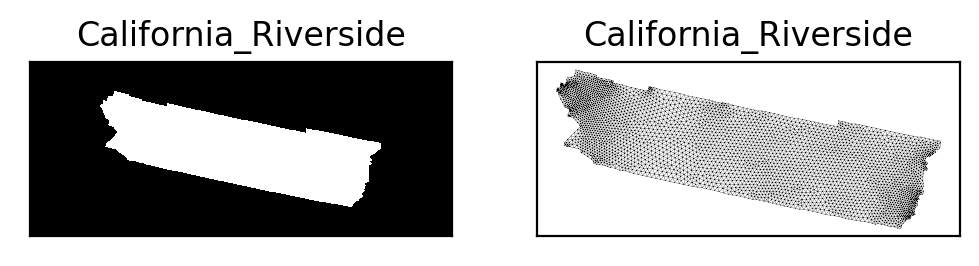

In [102]:
county = 'California_Riverside'

save_path = f'yearly/processed/{county}_mesh.xml'
load_path = f'yearly/processed/{county}.hdf5'

with h5py.File(load_path, 'r') as h5f:
    d = h5f['2010']
    mask = d['mask'][:].astype(bool)
    x_grid = d['x_grid'][:] / spatial_scale
    y_grid = d['y_grid'][:] / spatial_scale
    
    mask_float = np.zeros(mask.shape, dtype=np.uint8)
    mask_float[mask] = 255
    contours, _ = cv2.findContours(mask_float, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)

    '''
    countours is a list of lists -- you can change the index below here to get 
        different contours to choose as the mesh.
    '''
    idx = np.argmax([contours[i].squeeze().shape[0] for i in range(len(contours))])
    polygon = contours[idx].squeeze()
    print(mask.shape, polygon.shape)
    pos_x = x_grid[polygon[:, 1], polygon[:, 0]]
    pos_y = y_grid[polygon[:, 1], polygon[:, 0]]

    with pygmsh.geo.Geometry() as geom:
        geom.add_polygon(np.stack([pos_x, pos_y], axis=-1), mesh_size=4)
        mesh = geom.generate_mesh(dim=2, verbose=True)
    mesh.points = mesh.points[:, :2]
    mesh.write(save_path)
    
    print(mesh)
    
fig, ax = plt.subplots(1, 2, dpi=200)
ax[0].pcolormesh(x_grid, y_grid, mask, cmap='Greys_r')
ax[1].triplot(mesh.points[:, 0], mesh.points[:, 1], mesh.cells[1].data,
              color='black', linewidth=0.1)

for a in ax:
    a.set(xticks=[], yticks=[], title=county, aspect='equal');


In [103]:
from data_processing import *
from yearly_pbnn import *

dataset = YearlyDataset(county)
print('Loaded dataset', flush=True)

model = SourcedOnlyPBNN()
model.training_step(dataset[0])

Building dataset with constant housing in time
Loaded dataset


({'Si': tensor([ 0.0626,  0.0666,  0.0830,  ..., -0.0204, -0.0246, -0.0352],
         grad_fn=<ReshapeAliasBackward0>)},
 71.20866506540696)

# California, Sacramento (Fix Dataset size variation)

(219, 248) (139, 2)


Warning: DOLFIN XML is a legacy format. Consider using XDMF instead.

Warning: DOLFIN XML can only handle one cell type at a time. Using triangle, discarding 
vertex, line.

<meshio mesh object>
  Number of points: 913
  Number of cells:
    line: 155
    triangle: 1669
    vertex: 139


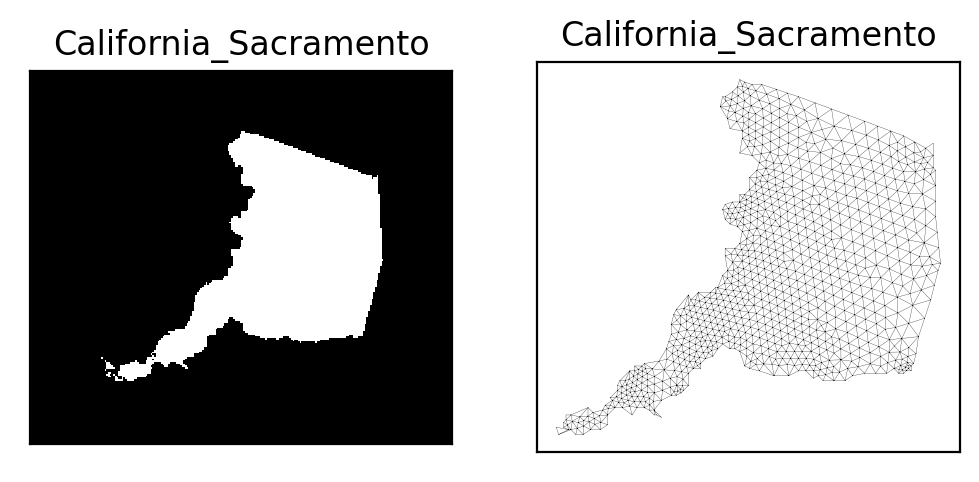

In [112]:
county = 'California_Sacramento'

save_path = f'yearly/processed/{county}_mesh.xml'
load_path = f'yearly/processed/{county}.hdf5'

with h5py.File(load_path, 'r') as h5f:
    d = h5f['2010']
    mask = d['mask'][:].astype(bool)
    x_grid = d['x_grid'][:] / spatial_scale
    y_grid = d['y_grid'][:] / spatial_scale
    
    mask_float = np.zeros(mask.shape, dtype=np.uint8)
    mask_float[mask] = 255
    contours, _ = cv2.findContours(mask_float, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)

    '''
    countours is a list of lists -- you can change the index below here to get 
        different contours to choose as the mesh.
    '''
    idx = np.argmax([contours[i].squeeze().shape[0] for i in range(len(contours))])
    polygon = contours[idx].squeeze()
    print(mask.shape, polygon.shape)
    pos_x = x_grid[polygon[:, 1], polygon[:, 0]]
    pos_y = y_grid[polygon[:, 1], polygon[:, 0]]

    with pygmsh.geo.Geometry() as geom:
        geom.add_polygon(np.stack([pos_x, pos_y], axis=-1), mesh_size=4)
        mesh = geom.generate_mesh(dim=2, verbose=True)
    mesh.points = mesh.points[:, :2]
    mesh.write(save_path)
    
    print(mesh)
    
fig, ax = plt.subplots(1, 2, dpi=200)
ax[0].pcolormesh(x_grid, y_grid, mask, cmap='Greys_r')
ax[1].triplot(mesh.points[:, 0], mesh.points[:, 1], mesh.cells[1].data,
              color='black', linewidth=0.1)

for a in ax:
    a.set(xticks=[], yticks=[], title=county, aspect='equal');


In [117]:
from data_processing import *
from yearly_pbnn import *

dataset = YearlyDataset(county)
print('Loaded dataset', flush=True)

model = SourcedOnlyPBNN()
model.training_step(dataset[0])

(12, 3)
Building dataset with constant housing in time


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

# California, San Bernardino (Too Big)

(746, 1008) (238, 2)


Warning: DOLFIN XML is a legacy format. Consider using XDMF instead.

Warning: DOLFIN XML can only handle one cell type at a time. Using triangle, discarding 
vertex, line.

<meshio mesh object>
  Number of points: 8635
  Number of cells:
    line: 381
    triangle: 16887
    vertex: 238


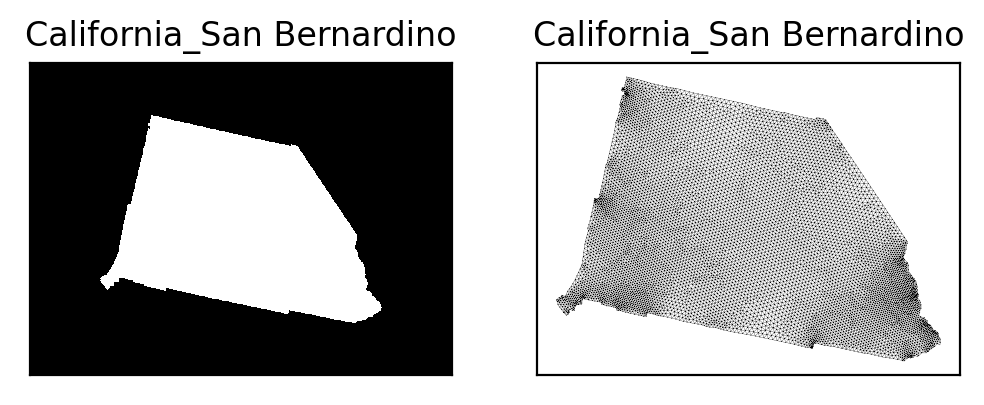

In [85]:
county = 'California_San Bernardino'

save_path = f'yearly/processed/{county}_mesh.xml'
load_path = f'yearly/processed/{county}.hdf5'

with h5py.File(load_path, 'r') as h5f:
    d = h5f['2010']
    mask = d['mask'][:].astype(bool)
    x_grid = d['x_grid'][:] / spatial_scale
    y_grid = d['y_grid'][:] / spatial_scale
    
    mask_float = np.zeros(mask.shape, dtype=np.uint8)
    mask_float[mask] = 255
    contours, _ = cv2.findContours(mask_float, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)

    '''
    countours is a list of lists -- you can change the index below here to get 
        different contours to choose as the mesh.
    '''
    idx = np.argmax([contours[i].squeeze().shape[0] for i in range(len(contours))])
    polygon = contours[idx].squeeze()
    print(mask.shape, polygon.shape)
    pos_x = x_grid[polygon[:, 1], polygon[:, 0]]
    pos_y = y_grid[polygon[:, 1], polygon[:, 0]]

    with pygmsh.geo.Geometry() as geom:
        geom.add_polygon(np.stack([pos_x, pos_y], axis=-1), mesh_size=4)
        mesh = geom.generate_mesh(dim=2, verbose=True)
    mesh.points = mesh.points[:, :2]
    mesh.write(save_path)
    
    print(mesh)
    
fig, ax = plt.subplots(1, 2, dpi=200)
ax[0].pcolormesh(x_grid, y_grid, mask, cmap='Greys_r')
ax[1].triplot(mesh.points[:, 0], mesh.points[:, 1], mesh.cells[1].data,
              color='black', linewidth=0.1)

for a in ax:
    a.set(xticks=[], yticks=[], title=county, aspect='equal');


# California, San Diego (CREATES NaN, Fix or do not use)

(375, 412) (132, 2)


Warning: DOLFIN XML is a legacy format. Consider using XDMF instead.

Warning: DOLFIN XML can only handle one cell type at a time. Using triangle, discarding 
vertex, line.

<meshio mesh object>
  Number of points: 2157
  Number of cells:
    line: 196
    triangle: 4116
    vertex: 132


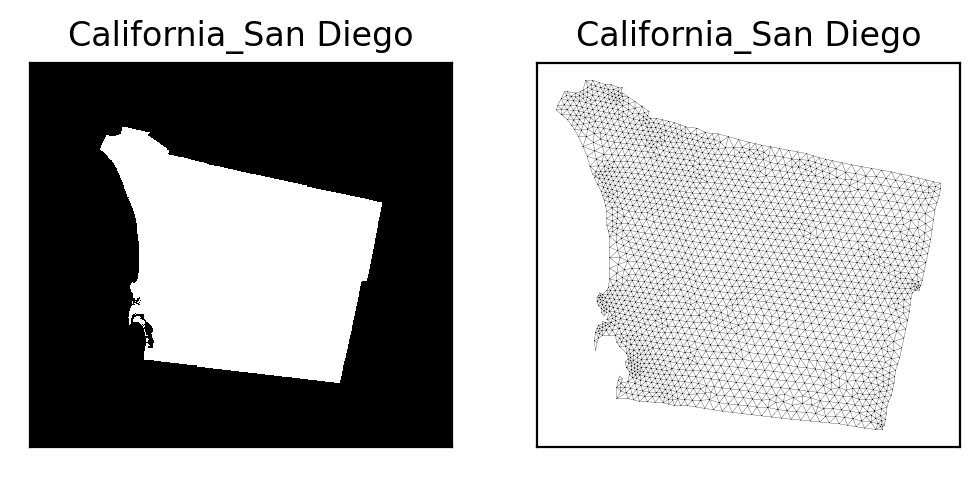

In [118]:
county = 'California_San Diego'

save_path = f'yearly/processed/{county}_mesh.xml'
load_path = f'yearly/processed/{county}.hdf5'

with h5py.File(load_path, 'r') as h5f:
    d = h5f['2010']
    mask = d['mask'][:].astype(bool)
    x_grid = d['x_grid'][:] / spatial_scale
    y_grid = d['y_grid'][:] / spatial_scale
    
    mask_float = np.zeros(mask.shape, dtype=np.uint8)
    mask_float[mask] = 255
    contours, _ = cv2.findContours(mask_float, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)

    '''
    countours is a list of lists -- you can change the index below here to get 
        different contours to choose as the mesh.
    '''
    idx = np.argmax([contours[i].squeeze().shape[0] for i in range(len(contours))])
    polygon = contours[idx].squeeze()
    print(mask.shape, polygon.shape)
    pos_x = x_grid[polygon[:, 1], polygon[:, 0]]
    pos_y = y_grid[polygon[:, 1], polygon[:, 0]]

    with pygmsh.geo.Geometry() as geom:
        geom.add_polygon(np.stack([pos_x, pos_y], axis=-1), mesh_size=4)
        mesh = geom.generate_mesh(dim=2, verbose=True)
    mesh.points = mesh.points[:, :2]
    mesh.write(save_path)
    
    print(mesh)
    
fig, ax = plt.subplots(1, 2, dpi=200)
ax[0].pcolormesh(x_grid, y_grid, mask, cmap='Greys_r')
ax[1].triplot(mesh.points[:, 0], mesh.points[:, 1], mesh.cells[1].data,
              color='black', linewidth=0.1)

for a in ax:
    a.set(xticks=[], yticks=[], title=county, aspect='equal');


In [121]:
from data_processing import *
from yearly_pbnn import *

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
dataset = YearlyDataset(county)
print('Loaded dataset', flush=True)

model = SourcedOnlyPBNN()
model = model.to(device)

sample = dataset[0]
sample['wb0'] = sample['wb0'].to(device)
model.training_step(sample)

(12, 3, 375, 412)
Building dataset with constant housing in time
Loaded dataset


({'Si': tensor([-0.0902, -0.0941, -0.0794,  ..., -0.0400, -0.0459, -0.0360],
         device='cuda:0', grad_fn=<ReshapeAliasBackward0>)},
 nan)

# California, Santa Clara

(227, 231) (155, 2)


Warning: DOLFIN XML is a legacy format. Consider using XDMF instead.

Warning: DOLFIN XML can only handle one cell type at a time. Using triangle, discarding 
vertex, line.

<meshio mesh object>
  Number of points: 1344
  Number of cells:
    line: 158
    triangle: 2528
    vertex: 155


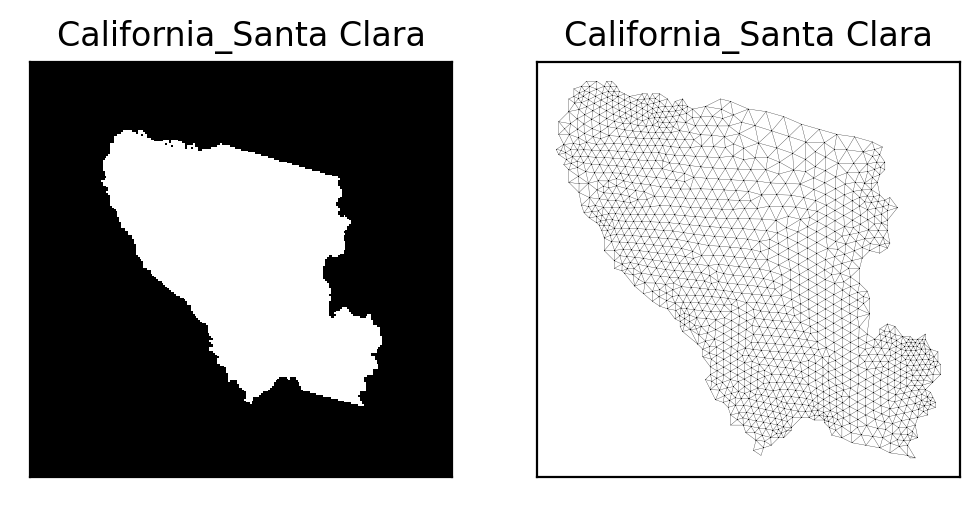

In [122]:
county = 'California_Santa Clara'

save_path = f'yearly/processed/{county}_mesh.xml'
load_path = f'yearly/processed/{county}.hdf5'

with h5py.File(load_path, 'r') as h5f:
    d = h5f['2010']
    mask = d['mask'][:].astype(bool)
    x_grid = d['x_grid'][:] / spatial_scale
    y_grid = d['y_grid'][:] / spatial_scale
    
    mask_float = np.zeros(mask.shape, dtype=np.uint8)
    mask_float[mask] = 255
    contours, _ = cv2.findContours(mask_float, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)

    '''
    countours is a list of lists -- you can change the index below here to get 
        different contours to choose as the mesh.
    '''
    idx = np.argmax([contours[i].squeeze().shape[0] for i in range(len(contours))])
    polygon = contours[idx].squeeze()
    print(mask.shape, polygon.shape)
    pos_x = x_grid[polygon[:, 1], polygon[:, 0]]
    pos_y = y_grid[polygon[:, 1], polygon[:, 0]]

    with pygmsh.geo.Geometry() as geom:
        geom.add_polygon(np.stack([pos_x, pos_y], axis=-1), mesh_size=4)
        mesh = geom.generate_mesh(dim=2, verbose=True)
    mesh.points = mesh.points[:, :2]
    mesh.write(save_path)
    
    print(mesh)
    
fig, ax = plt.subplots(1, 2, dpi=200)
ax[0].pcolormesh(x_grid, y_grid, mask, cmap='Greys_r')
ax[1].triplot(mesh.points[:, 0], mesh.points[:, 1], mesh.cells[1].data,
              color='black', linewidth=0.1)

for a in ax:
    a.set(xticks=[], yticks=[], title=county, aspect='equal');


In [123]:
from data_processing import *
from yearly_pbnn import *

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
dataset = YearlyDataset(county)
print('Loaded dataset', flush=True)

model = SourcedOnlyPBNN()
model = model.to(device)

sample = dataset[0]
sample['wb0'] = sample['wb0'].to(device)
model.training_step(sample)

(12, 3, 227, 231)
Building dataset with constant housing in time
Loaded dataset


({'Si': tensor([-0.0210, -0.0215, -0.0221,  ..., -0.0319, -0.0319, -0.0334],
         device='cuda:0', grad_fn=<ReshapeAliasBackward0>)},
 47.43706939949165)

# Florida, Broward, (CREATES NaN, Fix or do not use)

(152, 248) (50, 2)


Warning: DOLFIN XML is a legacy format. Consider using XDMF instead.

Warning: DOLFIN XML can only handle one cell type at a time. Using triangle, discarding 
vertex, line.

<meshio mesh object>
  Number of points: 548
  Number of cells:
    line: 86
    triangle: 1008
    vertex: 50


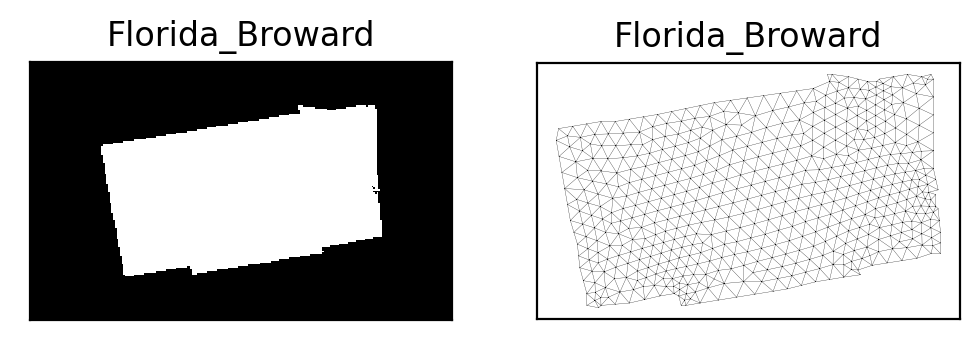

In [3]:
county = 'Florida_Broward'

save_path = f'yearly/processed/{county}_mesh.xml'
load_path = f'yearly/processed/{county}.hdf5'

with h5py.File(load_path, 'r') as h5f:
    d = h5f['2010']
    mask = d['mask'][:].astype(bool)
    x_grid = d['x_grid'][:] / spatial_scale
    y_grid = d['y_grid'][:] / spatial_scale
    
    mask_float = np.zeros(mask.shape, dtype=np.uint8)
    mask_float[mask] = 255
    contours, _ = cv2.findContours(mask_float, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)

    '''
    countours is a list of lists -- you can change the index below here to get 
        different contours to choose as the mesh.
    '''
    idx = np.argmax([contours[i].squeeze().shape[0] for i in range(len(contours))])
    polygon = contours[idx].squeeze()
    print(mask.shape, polygon.shape)
    pos_x = x_grid[polygon[:, 1], polygon[:, 0]]
    pos_y = y_grid[polygon[:, 1], polygon[:, 0]]

    with pygmsh.geo.Geometry() as geom:
        geom.add_polygon(np.stack([pos_x, pos_y], axis=-1), mesh_size=4)
        mesh = geom.generate_mesh(dim=2, verbose=True)
    mesh.points = mesh.points[:, :2]
    mesh.write(save_path)
    
    print(mesh)
    
fig, ax = plt.subplots(1, 2, dpi=200)
ax[0].pcolormesh(x_grid, y_grid, mask, cmap='Greys_r')
ax[1].triplot(mesh.points[:, 0], mesh.points[:, 1], mesh.cells[1].data,
              color='black', linewidth=0.1)

for a in ax:
    a.set(xticks=[], yticks=[], title=county, aspect='equal');

In [4]:
from data_processing import *
from yearly_pbnn import *

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
dataset = YearlyDataset(county)
print('Loaded dataset', flush=True)

model = SourcedOnlyPBNN()
model = model.to(device)

sample = dataset[0]
sample['wb0'] = sample['wb0'].to(device)
model.training_step(sample)

(12, 3, 152, 248)
Building dataset with constant housing in time
Loaded dataset


({'Si': tensor([-0.0131, -0.0272, -0.0202,  ...,  0.0931,  0.0977,  0.0928],
         device='cuda:0', grad_fn=<ReshapeAliasBackward0>)},
 nan)

# Florida, Hillsborough (Hangs on Meshing)

In [ ]:
county = 'Florida_Hillsborough'

save_path = f'yearly/processed/{county}_mesh.xml'
load_path = f'yearly/processed/{county}.hdf5'

with h5py.File(load_path, 'r') as h5f:
    d = h5f['2010']
    mask = d['mask'][:].astype(bool)
    x_grid = d['x_grid'][:] / spatial_scale
    y_grid = d['y_grid'][:] / spatial_scale
    
    mask_float = np.zeros(mask.shape, dtype=np.uint8)
    mask_float[mask] = 255
    contours, _ = cv2.findContours(mask_float, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)

    '''
    countours is a list of lists -- you can change the index below here to get 
        different contours to choose as the mesh.
    '''
    idx = np.argmax([contours[i].squeeze().shape[0] for i in range(len(contours))])
    polygon = contours[idx].squeeze()
    print(mask.shape, polygon.shape)
    pos_x = x_grid[polygon[:, 1], polygon[:, 0]]
    pos_y = y_grid[polygon[:, 1], polygon[:, 0]]

    with pygmsh.geo.Geometry() as geom:
        geom.add_polygon(np.stack([pos_x, pos_y], axis=-1), mesh_size=4)
        mesh = geom.generate_mesh(dim=2, verbose=True)
    mesh.points = mesh.points[:, :2]
    mesh.write(save_path)
    
    print(mesh)
    
fig, ax = plt.subplots(1, 2, dpi=200)
ax[0].pcolormesh(x_grid, y_grid, mask, cmap='Greys_r')
ax[1].triplot(mesh.points[:, 0], mesh.points[:, 1], mesh.cells[1].data,
              color='black', linewidth=0.1)

for a in ax:
    a.set(xticks=[], yticks=[], title=county, aspect='equal');

(225, 208) (121, 2)


In [ ]:
from data_processing import *
from yearly_pbnn import *

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
dataset = YearlyDataset(county)
print('Loaded dataset', flush=True)

model = SourcedOnlyPBNN()
model = model.to(device)

sample = dataset[0]
sample['wb0'] = sample['wb0'].to(device)
model.training_step(sample)

# Florida, Miami-Dade (Hangs on Meshing)

In [ ]:
county = 'Florida_Miami-Dade'

save_path = f'yearly/processed/{county}_mesh.xml'
load_path = f'yearly/processed/{county}.hdf5'

with h5py.File(load_path, 'r') as h5f:
    d = h5f['2010']
    mask = d['mask'][:].astype(bool)
    x_grid = d['x_grid'][:] / spatial_scale
    y_grid = d['y_grid'][:] / spatial_scale
    
    mask_float = np.zeros(mask.shape, dtype=np.uint8)
    mask_float[mask] = 255
    contours, _ = cv2.findContours(mask_float, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)

    '''
    countours is a list of lists -- you can change the index below here to get 
        different contours to choose as the mesh.
    '''
    idx = np.argmax([contours[i].squeeze().shape[0] for i in range(len(contours))])
    polygon = contours[idx].squeeze()
    print(mask.shape, polygon.shape)
    pos_x = x_grid[polygon[:, 1], polygon[:, 0]]
    pos_y = y_grid[polygon[:, 1], polygon[:, 0]]

    with pygmsh.geo.Geometry() as geom:
        geom.add_polygon(np.stack([pos_x, pos_y], axis=-1), mesh_size=4)
        mesh = geom.generate_mesh(dim=2, verbose=True)
    mesh.points = mesh.points[:, :2]
    mesh.write(save_path)
    
    print(mesh)
    
fig, ax = plt.subplots(1, 2, dpi=200)
ax[0].pcolormesh(x_grid, y_grid, mask, cmap='Greys_r')
ax[1].triplot(mesh.points[:, 0], mesh.points[:, 1], mesh.cells[1].data,
              color='black', linewidth=0.1)

for a in ax:
    a.set(xticks=[], yticks=[], title=county, aspect='equal');

(305, 236) (162, 2)


In [ ]:
from data_processing import *
from yearly_pbnn import *

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
dataset = YearlyDataset(county)
print('Loaded dataset', flush=True)

model = SourcedOnlyPBNN()
model = model.to(device)

sample = dataset[0]
sample['wb0'] = sample['wb0'].to(device)
model.training_step(sample)

# Florida, Palm Beach (Hangs on Meshing)

In [ ]:
county = 'Florida_Palm Beach'

save_path = f'yearly/processed/{county}_mesh.xml'
load_path = f'yearly/processed/{county}.hdf5'

with h5py.File(load_path, 'r') as h5f:
    d = h5f['2010']
    mask = d['mask'][:].astype(bool)
    x_grid = d['x_grid'][:] / spatial_scale
    y_grid = d['y_grid'][:] / spatial_scale
    
    mask_float = np.zeros(mask.shape, dtype=np.uint8)
    mask_float[mask] = 255
    contours, _ = cv2.findContours(mask_float, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)

    '''
    countours is a list of lists -- you can change the index below here to get 
        different contours to choose as the mesh.
    '''
    idx = np.argmax([contours[i].squeeze().shape[0] for i in range(len(contours))])
    polygon = contours[idx].squeeze()
    print(mask.shape, polygon.shape)
    pos_x = x_grid[polygon[:, 1], polygon[:, 0]]
    pos_y = y_grid[polygon[:, 1], polygon[:, 0]]

    with pygmsh.geo.Geometry() as geom:
        geom.add_polygon(np.stack([pos_x, pos_y], axis=-1), mesh_size=4)
        mesh = geom.generate_mesh(dim=2, verbose=True)
    mesh.points = mesh.points[:, :2]
    mesh.write(save_path)
    
    print(mesh)
    
fig, ax = plt.subplots(1, 2, dpi=200)
ax[0].pcolormesh(x_grid, y_grid, mask, cmap='Greys_r')
ax[1].triplot(mesh.points[:, 0], mesh.points[:, 1], mesh.cells[1].data,
              color='black', linewidth=0.1)

for a in ax:
    a.set(xticks=[], yticks=[], title=county, aspect='equal');

(247, 276) (81, 2)


In [ ]:
from data_processing import *
from yearly_pbnn import *

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
dataset = YearlyDataset(county)
print('Loaded dataset', flush=True)

model = SourcedOnlyPBNN()
model = model.to(device)

sample = dataset[0]
sample['wb0'] = sample['wb0'].to(device)
model.training_step(sample)

# Illinois, Cook

(229, 200) (166, 2)


Warning: DOLFIN XML is a legacy format. Consider using XDMF instead.

Warning: DOLFIN XML can only handle one cell type at a time. Using triangle, discarding line,
vertex.

<meshio mesh object>
  Number of points: 1576
  Number of cells:
    line: 188
    triangle: 2962
    vertex: 166


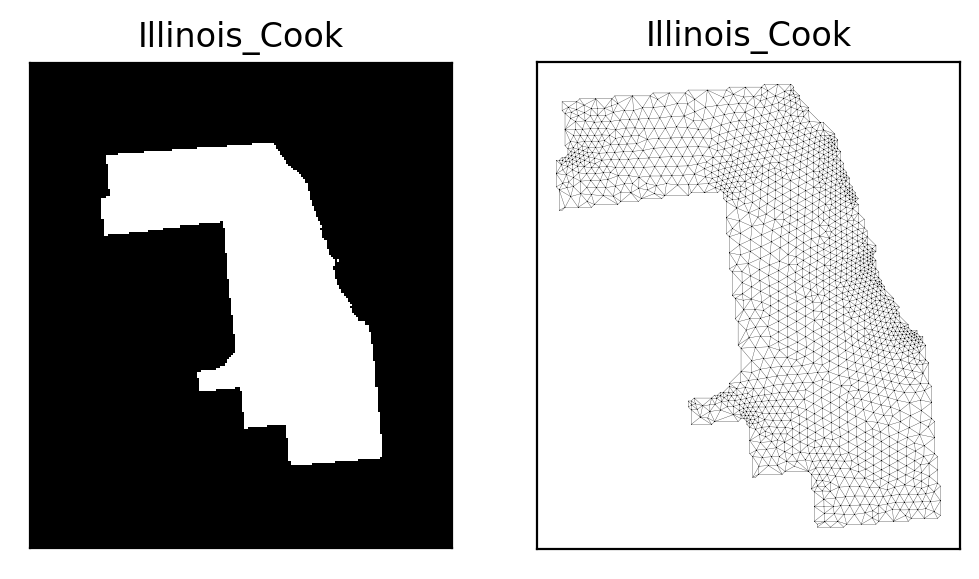

In [2]:
county = 'Illinois_Cook'

save_path = f'yearly/processed/{county}_mesh.xml'
load_path = f'yearly/processed/{county}.hdf5'

with h5py.File(load_path, 'r') as h5f:
    d = h5f['2010']
    mask = d['mask'][:].astype(bool)
    x_grid = d['x_grid'][:] / spatial_scale
    y_grid = d['y_grid'][:] / spatial_scale
    
    mask_float = np.zeros(mask.shape, dtype=np.uint8)
    mask_float[mask] = 255
    contours, _ = cv2.findContours(mask_float, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    '''
    countours is a list of lists -- you can change the index below here to get 
        different contours to choose as the mesh.
    '''
    idx = np.argmax([contours[i].squeeze().shape[0] for i in range(len(contours))])
    polygon = contours[idx].squeeze()
    print(mask.shape, polygon.shape)
    pos_x = x_grid[polygon[:, 1], polygon[:, 0]]
    pos_y = y_grid[polygon[:, 1], polygon[:, 0]]

    with pygmsh.geo.Geometry() as geom:
        geom.add_polygon(np.stack([pos_x, pos_y], axis=-1), mesh_size=4)
        mesh = geom.generate_mesh(dim=2, verbose=True)
    mesh.points = mesh.points[:, :2]
    mesh.write(save_path)
    
    print(mesh)
    
fig, ax = plt.subplots(1, 2, dpi=200)
ax[0].pcolormesh(x_grid, y_grid, mask, cmap='Greys_r')
ax[1].triplot(mesh.points[:, 0], mesh.points[:, 1], mesh.cells[1].data,
              color='black', linewidth=0.1)

for a in ax:
    a.set(xticks=[], yticks=[], title=county, aspect='equal');

In [3]:
from data_processing import *
from yearly_pbnn import *

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
dataset = YearlyDataset(county)
print('Loaded dataset', flush=True)

model = SourcedOnlyPBNN()
model = model.to(device)

sample = dataset[0]
sample['wb0'] = sample['wb0'].to(device)
model.training_step(sample)

(12, 3, 229, 200)
Building dataset with constant housing in time
Loaded dataset


({'Si': tensor([0.1460, 0.1489, 0.1461,  ..., 0.1726, 0.1704, 0.1656], device='cuda:0',
         grad_fn=<ReshapeAliasBackward0>)},
 1.8531507797200815)

# Massachusetts, Middlesex (Non-constant map)

(203, 232) (150, 2)


Warning: DOLFIN XML is a legacy format. Consider using XDMF instead.

Warning: DOLFIN XML can only handle one cell type at a time. Using triangle, discarding line,
vertex.

<meshio mesh object>
  Number of points: 1158
  Number of cells:
    line: 161
    triangle: 2153
    vertex: 150


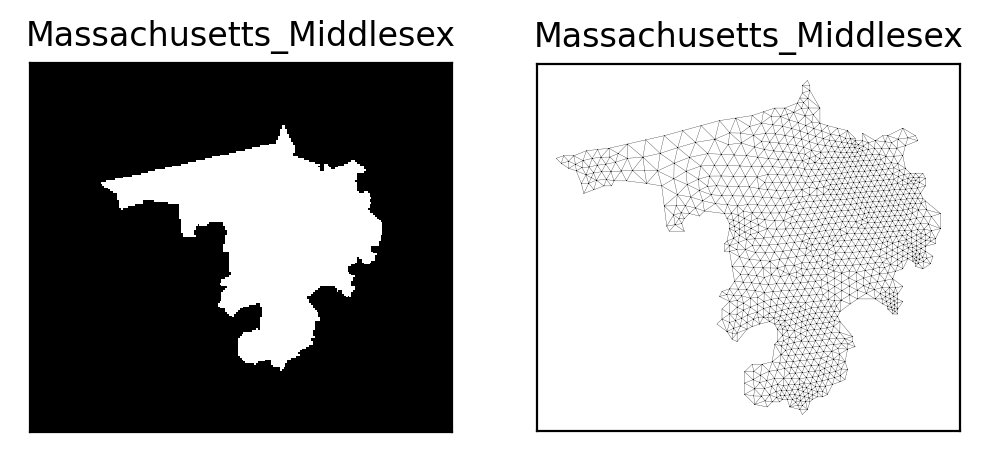

In [5]:
county = 'Massachusetts_Middlesex'

save_path = f'yearly/processed/{county}_mesh.xml'
load_path = f'yearly/processed/{county}.hdf5'

with h5py.File(load_path, 'r') as h5f:
    d = h5f['2010']
    mask = d['mask'][:].astype(bool)
    x_grid = d['x_grid'][:] / spatial_scale
    y_grid = d['y_grid'][:] / spatial_scale
    
    mask_float = np.zeros(mask.shape, dtype=np.uint8)
    mask_float[mask] = 255
    contours, _ = cv2.findContours(mask_float, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)

    '''
    countours is a list of lists -- you can change the index below here to get 
        different contours to choose as the mesh.
    '''
    idx = np.argmax([contours[i].squeeze().shape[0] for i in range(len(contours))])
    polygon = contours[idx].squeeze()
    print(mask.shape, polygon.shape)
    pos_x = x_grid[polygon[:, 1], polygon[:, 0]]
    pos_y = y_grid[polygon[:, 1], polygon[:, 0]]

    with pygmsh.geo.Geometry() as geom:
        geom.add_polygon(np.stack([pos_x, pos_y], axis=-1), mesh_size=4)
        mesh = geom.generate_mesh(dim=2, verbose=True)
    mesh.points = mesh.points[:, :2]
    mesh.write(save_path)
    
    print(mesh)
    
fig, ax = plt.subplots(1, 2, dpi=200)
ax[0].pcolormesh(x_grid, y_grid, mask, cmap='Greys_r')
ax[1].triplot(mesh.points[:, 0], mesh.points[:, 1], mesh.cells[1].data,
              color='black', linewidth=0.1)

for a in ax:
    a.set(xticks=[], yticks=[], title=county, aspect='equal');

In [6]:
from data_processing import *
from yearly_pbnn import *

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
dataset = YearlyDataset(county)
print('Loaded dataset', flush=True)

model = SourcedOnlyPBNN()
model = model.to(device)

sample = dataset[0]
sample['wb0'] = sample['wb0'].to(device)
model.training_step(sample)

(12, 3)
Building dataset with constant housing in time


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

# Michigan, Oakland

(171, 166) (42, 2)


Warning: DOLFIN XML is a legacy format. Consider using XDMF instead.

Warning: DOLFIN XML can only handle one cell type at a time. Using triangle, discarding line,
vertex.

<meshio mesh object>
  Number of points: 355
  Number of cells:
    line: 71
    triangle: 637
    vertex: 42


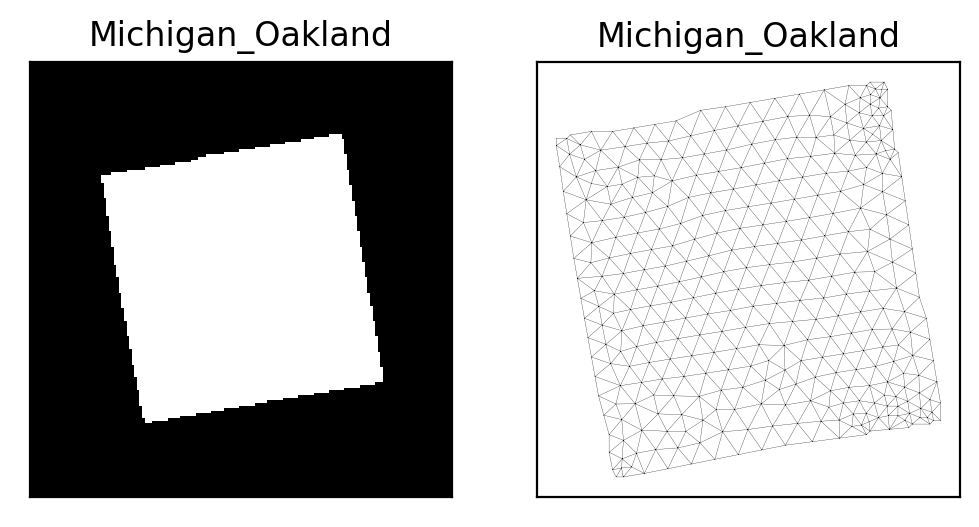

In [8]:
county = 'Michigan_Oakland'

save_path = f'yearly/processed/{county}_mesh.xml'
load_path = f'yearly/processed/{county}.hdf5'

with h5py.File(load_path, 'r') as h5f:
    d = h5f['2010']
    mask = d['mask'][:].astype(bool)
    x_grid = d['x_grid'][:] / spatial_scale
    y_grid = d['y_grid'][:] / spatial_scale
    
    mask_float = np.zeros(mask.shape, dtype=np.uint8)
    mask_float[mask] = 255
    contours, _ = cv2.findContours(mask_float, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)

    '''
    countours is a list of lists -- you can change the index below here to get 
        different contours to choose as the mesh.
    '''
    idx = np.argmax([contours[i].squeeze().shape[0] for i in range(len(contours))])
    polygon = contours[idx].squeeze()
    print(mask.shape, polygon.shape)
    pos_x = x_grid[polygon[:, 1], polygon[:, 0]]
    pos_y = y_grid[polygon[:, 1], polygon[:, 0]]

    with pygmsh.geo.Geometry() as geom:
        geom.add_polygon(np.stack([pos_x, pos_y], axis=-1), mesh_size=4)
        mesh = geom.generate_mesh(dim=2, verbose=True)
    mesh.points = mesh.points[:, :2]
    mesh.write(save_path)
    
    print(mesh)
    
fig, ax = plt.subplots(1, 2, dpi=200)
ax[0].pcolormesh(x_grid, y_grid, mask, cmap='Greys_r')
ax[1].triplot(mesh.points[:, 0], mesh.points[:, 1], mesh.cells[1].data,
              color='black', linewidth=0.1)

for a in ax:
    a.set(xticks=[], yticks=[], title=county, aspect='equal');

In [9]:
from data_processing import *
from yearly_pbnn import *

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
dataset = YearlyDataset(county)
print('Loaded dataset', flush=True)

model = SourcedOnlyPBNN()
model = model.to(device)

sample = dataset[0]
sample['wb0'] = sample['wb0'].to(device)
model.training_step(sample)

(12, 3, 171, 166)
Building dataset with constant housing in time
Loaded dataset


({'Si': tensor([0.0302, 0.0361, 0.0389,  ..., 0.0428, 0.0488, 0.0427], device='cuda:0',
         grad_fn=<ReshapeAliasBackward0>)},
 0.0003623262601599593)

# Michigan, Wayne (NaN, Do not use)

(151, 166) (67, 2)


Warning: DOLFIN XML is a legacy format. Consider using XDMF instead.

Warning: DOLFIN XML can only handle one cell type at a time. Using triangle, discarding line,
vertex.

<meshio mesh object>
  Number of points: 439
  Number of cells:
    line: 85
    triangle: 791
    vertex: 67


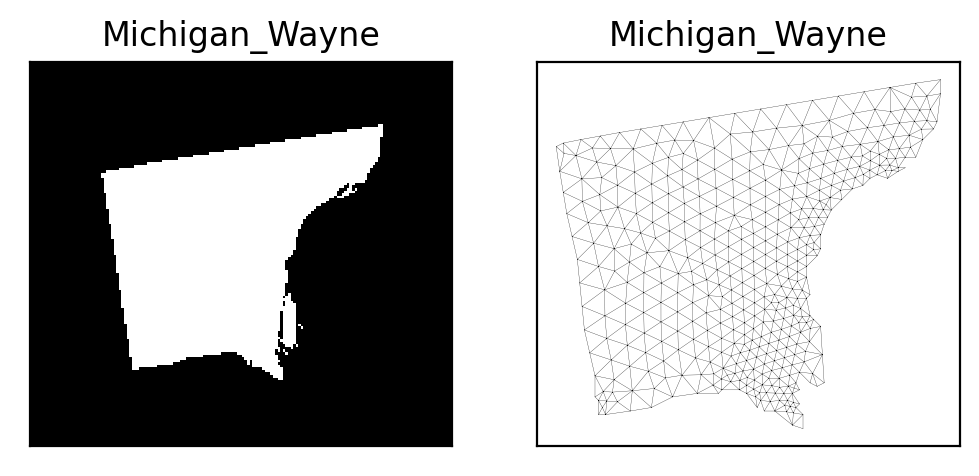

In [10]:
county = 'Michigan_Wayne'

save_path = f'yearly/processed/{county}_mesh.xml'
load_path = f'yearly/processed/{county}.hdf5'

with h5py.File(load_path, 'r') as h5f:
    d = h5f['2010']
    mask = d['mask'][:].astype(bool)
    x_grid = d['x_grid'][:] / spatial_scale
    y_grid = d['y_grid'][:] / spatial_scale
    
    mask_float = np.zeros(mask.shape, dtype=np.uint8)
    mask_float[mask] = 255
    contours, _ = cv2.findContours(mask_float, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)

    '''
    countours is a list of lists -- you can change the index below here to get 
        different contours to choose as the mesh.
    '''
    idx = np.argmax([contours[i].squeeze().shape[0] for i in range(len(contours))])
    polygon = contours[idx].squeeze()
    print(mask.shape, polygon.shape)
    pos_x = x_grid[polygon[:, 1], polygon[:, 0]]
    pos_y = y_grid[polygon[:, 1], polygon[:, 0]]

    with pygmsh.geo.Geometry() as geom:
        geom.add_polygon(np.stack([pos_x, pos_y], axis=-1), mesh_size=4)
        mesh = geom.generate_mesh(dim=2, verbose=True)
    mesh.points = mesh.points[:, :2]
    mesh.write(save_path)
    
    print(mesh)
    
fig, ax = plt.subplots(1, 2, dpi=200)
ax[0].pcolormesh(x_grid, y_grid, mask, cmap='Greys_r')
ax[1].triplot(mesh.points[:, 0], mesh.points[:, 1], mesh.cells[1].data,
              color='black', linewidth=0.1)

for a in ax:
    a.set(xticks=[], yticks=[], title=county, aspect='equal');

In [11]:
from data_processing import *
from yearly_pbnn import *

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
dataset = YearlyDataset(county)
print('Loaded dataset', flush=True)

model = SourcedOnlyPBNN()
model = model.to(device)

sample = dataset[0]
sample['wb0'] = sample['wb0'].to(device)
model.training_step(sample)

(12, 3, 151, 166)
Building dataset with constant housing in time
Loaded dataset


({'Si': tensor([-0.0328, -0.0149, -0.0205,  ..., -0.0659, -0.0676, -0.0679],
         device='cuda:0', grad_fn=<ReshapeAliasBackward0>)},
 nan)

# Minnesota, Hennepin

(154, 141) (71, 2)


Warning: DOLFIN XML is a legacy format. Consider using XDMF instead.

Warning: DOLFIN XML can only handle one cell type at a time. Using triangle, discarding line,
vertex.

<meshio mesh object>
  Number of points: 482
  Number of cells:
    line: 84
    triangle: 878
    vertex: 71


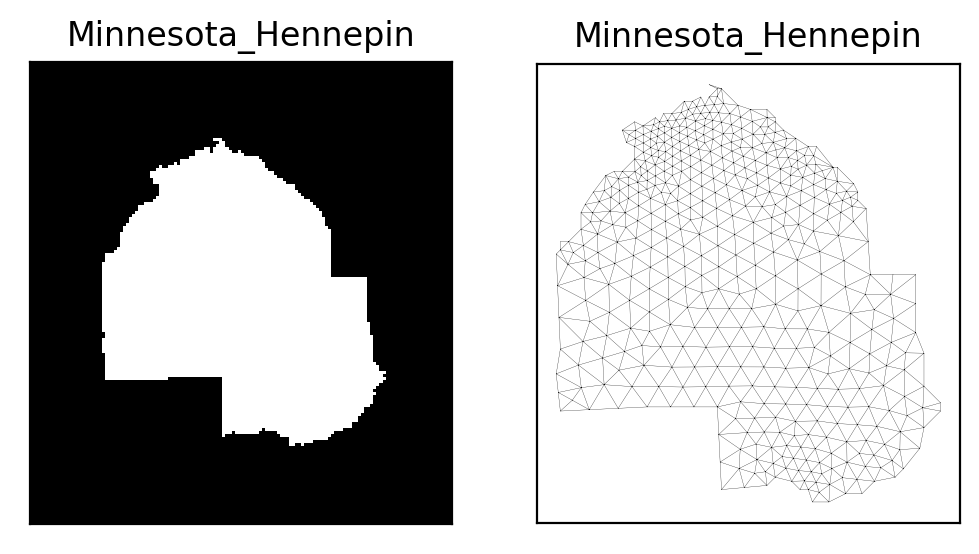

In [12]:
county = 'Minnesota_Hennepin'

save_path = f'yearly/processed/{county}_mesh.xml'
load_path = f'yearly/processed/{county}.hdf5'

with h5py.File(load_path, 'r') as h5f:
    d = h5f['2010']
    mask = d['mask'][:].astype(bool)
    x_grid = d['x_grid'][:] / spatial_scale
    y_grid = d['y_grid'][:] / spatial_scale
    
    mask_float = np.zeros(mask.shape, dtype=np.uint8)
    mask_float[mask] = 255
    contours, _ = cv2.findContours(mask_float, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)

    '''
    countours is a list of lists -- you can change the index below here to get 
        different contours to choose as the mesh.
    '''
    idx = np.argmax([contours[i].squeeze().shape[0] for i in range(len(contours))])
    polygon = contours[idx].squeeze()
    print(mask.shape, polygon.shape)
    pos_x = x_grid[polygon[:, 1], polygon[:, 0]]
    pos_y = y_grid[polygon[:, 1], polygon[:, 0]]

    with pygmsh.geo.Geometry() as geom:
        geom.add_polygon(np.stack([pos_x, pos_y], axis=-1), mesh_size=4)
        mesh = geom.generate_mesh(dim=2, verbose=True)
    mesh.points = mesh.points[:, :2]
    mesh.write(save_path)
    
    print(mesh)
    
fig, ax = plt.subplots(1, 2, dpi=200)
ax[0].pcolormesh(x_grid, y_grid, mask, cmap='Greys_r')
ax[1].triplot(mesh.points[:, 0], mesh.points[:, 1], mesh.cells[1].data,
              color='black', linewidth=0.1)

for a in ax:
    a.set(xticks=[], yticks=[], title=county, aspect='equal');

In [13]:
from data_processing import *
from yearly_pbnn import *

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
dataset = YearlyDataset(county)
print('Loaded dataset', flush=True)

model = SourcedOnlyPBNN()
model = model.to(device)

sample = dataset[0]
sample['wb0'] = sample['wb0'].to(device)
model.training_step(sample)

(12, 3, 154, 141)
Building dataset with constant housing in time
Loaded dataset


({'Si': tensor([-0.0114, -0.0086, -0.0084,  ...,  0.0368,  0.0375,  0.0354],
         device='cuda:0', grad_fn=<ReshapeAliasBackward0>)},
 0.8449546292946666)

# Nevada, Clark (NaN, do not use)

(674, 528) (181, 2)


Warning: DOLFIN XML is a legacy format. Consider using XDMF instead.

Warning: DOLFIN XML can only handle one cell type at a time. Using triangle, discarding line,
vertex.

<meshio mesh object>
  Number of points: 3947
  Number of cells:
    line: 277
    triangle: 7615
    vertex: 181


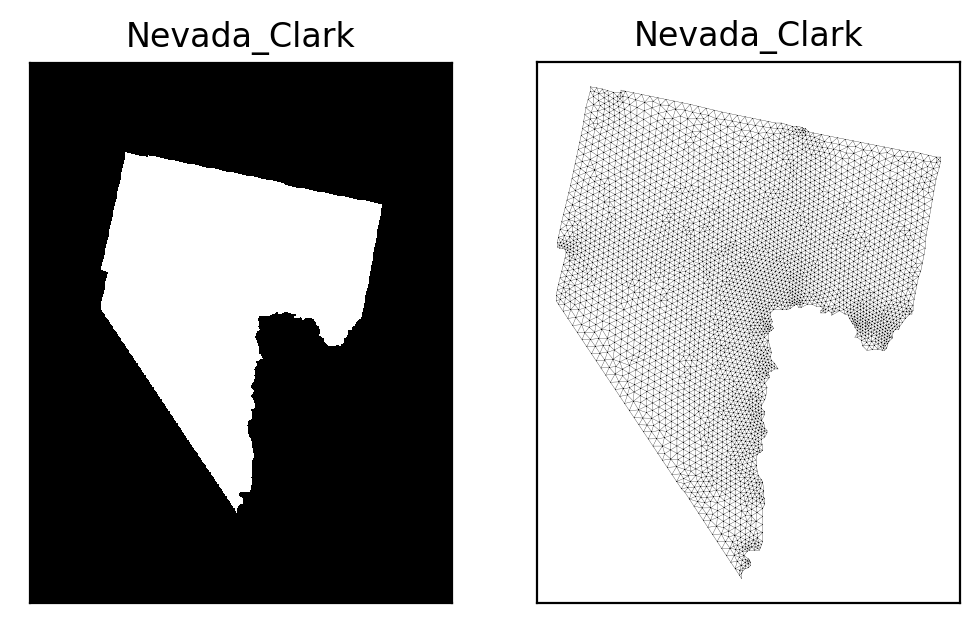

In [14]:
county = 'Nevada_Clark'

save_path = f'yearly/processed/{county}_mesh.xml'
load_path = f'yearly/processed/{county}.hdf5'

with h5py.File(load_path, 'r') as h5f:
    d = h5f['2010']
    mask = d['mask'][:].astype(bool)
    x_grid = d['x_grid'][:] / spatial_scale
    y_grid = d['y_grid'][:] / spatial_scale
    
    mask_float = np.zeros(mask.shape, dtype=np.uint8)
    mask_float[mask] = 255
    contours, _ = cv2.findContours(mask_float, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)

    '''
    countours is a list of lists -- you can change the index below here to get 
        different contours to choose as the mesh.
    '''
    idx = np.argmax([contours[i].squeeze().shape[0] for i in range(len(contours))])
    polygon = contours[idx].squeeze()
    print(mask.shape, polygon.shape)
    pos_x = x_grid[polygon[:, 1], polygon[:, 0]]
    pos_y = y_grid[polygon[:, 1], polygon[:, 0]]

    with pygmsh.geo.Geometry() as geom:
        geom.add_polygon(np.stack([pos_x, pos_y], axis=-1), mesh_size=4)
        mesh = geom.generate_mesh(dim=2, verbose=True)
    mesh.points = mesh.points[:, :2]
    mesh.write(save_path)
    
    print(mesh)
    
fig, ax = plt.subplots(1, 2, dpi=200)
ax[0].pcolormesh(x_grid, y_grid, mask, cmap='Greys_r')
ax[1].triplot(mesh.points[:, 0], mesh.points[:, 1], mesh.cells[1].data,
              color='black', linewidth=0.1)

for a in ax:
    a.set(xticks=[], yticks=[], title=county, aspect='equal');

In [15]:
from data_processing import *
from yearly_pbnn import *

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
dataset = YearlyDataset(county)
print('Loaded dataset', flush=True)

model = SourcedOnlyPBNN()
model = model.to(device)

sample = dataset[0]
sample['wb0'] = sample['wb0'].to(device)
model.training_step(sample)

(12, 3, 674, 528)
Building dataset with constant housing in time
Loaded dataset


({'Si': tensor([-0.0793, -0.0833, -0.0784,  ...,  0.0057,  0.0088,  0.0006],
         device='cuda:0', grad_fn=<ReshapeAliasBackward0>)},
 nan)

# New York, Bronx

In [17]:
county = 'New York_Bronx'

save_path = f'yearly/processed/{county}_mesh.xml'
load_path = f'yearly/processed/{county}.hdf5'

with h5py.File(load_path, 'r') as h5f:
    d = h5f['2010']
    mask = d['mask'][:].astype(bool)
    x_grid = d['x_grid'][:] / spatial_scale
    y_grid = d['y_grid'][:] / spatial_scale
    
    mask_float = np.zeros(mask.shape, dtype=np.uint8)
    mask_float[mask] = 255
    contours, _ = cv2.findContours(mask_float, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_L1)

    '''
    countours is a list of lists -- you can change the index below here to get 
        different contours to choose as the mesh.
    '''
    idx = np.argmax([contours[i].squeeze().shape[0] for i in range(len(contours))])
    polygon = contours[idx].squeeze()
    print(mask.shape, polygon.shape)
    pos_x = x_grid[polygon[:, 1], polygon[:, 0]]
    pos_y = y_grid[polygon[:, 1], polygon[:, 0]]

    with pygmsh.geo.Geometry() as geom:
        geom.add_polygon(np.stack([pos_x, pos_y], axis=-1), mesh_size=4)
        mesh = geom.generate_mesh(dim=2, verbose=True)
    mesh.points = mesh.points[:, :2]
    mesh.write(save_path)
    
    print(mesh)
    
fig, ax = plt.subplots(1, 2, dpi=200)
ax[0].pcolormesh(x_grid, y_grid, mask, cmap='Greys_r')
ax[1].triplot(mesh.points[:, 0], mesh.points[:, 1], mesh.cells[1].data,
              color='black', linewidth=0.1)

for a in ax:
    a.set(xticks=[], yticks=[], title=county, aspect='equal');

(43, 42) (37, 2)


Exception: Unable to recover the edge 60 (1/1) on curve 22 (on surface 1)

In [125]:
from data_processing import *
from yearly_pbnn import *

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
dataset = YearlyDataset(county)
print('Loaded dataset', flush=True)

model = SourcedOnlyPBNN()
model = model.to(device)

sample = dataset[0]
sample['wb0'] = sample['wb0'].to(device)
model.training_step(sample)

(12, 3, 229, 200)
Building dataset with constant housing in time
Loaded dataset


({'Si': tensor([ 0.0745,  0.0761,  0.0669,  ..., -0.1904, -0.2003, -0.2024],
         device='cuda:0', grad_fn=<ReshapeAliasBackward0>)},
 56.74506670955604)

# New York, Kings

(58, 53) (42, 2)


Warning: DOLFIN XML is a legacy format. Consider using XDMF instead.

Warning: DOLFIN XML can only handle one cell type at a time. Using triangle, discarding line,
vertex.

<meshio mesh object>
  Number of points: 141
  Number of cells:
    line: 42
    triangle: 238
    vertex: 42


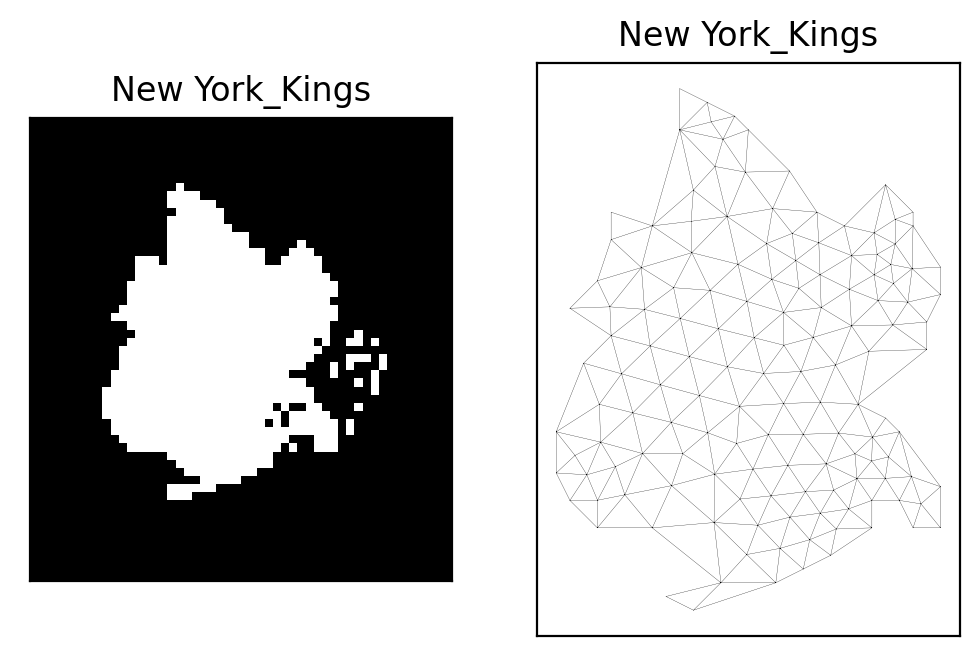

In [18]:
county = 'New York_Kings'

save_path = f'yearly/processed/{county}_mesh.xml'
load_path = f'yearly/processed/{county}.hdf5'

with h5py.File(load_path, 'r') as h5f:
    d = h5f['2010']
    mask = d['mask'][:].astype(bool)
    x_grid = d['x_grid'][:] / spatial_scale
    y_grid = d['y_grid'][:] / spatial_scale
    
    mask_float = np.zeros(mask.shape, dtype=np.uint8)
    mask_float[mask] = 255
    contours, _ = cv2.findContours(mask_float, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)

    '''
    countours is a list of lists -- you can change the index below here to get 
        different contours to choose as the mesh.
    '''
    idx = np.argmax([contours[i].squeeze().shape[0] for i in range(len(contours))])
    polygon = contours[idx].squeeze()
    print(mask.shape, polygon.shape)
    pos_x = x_grid[polygon[:, 1], polygon[:, 0]]
    pos_y = y_grid[polygon[:, 1], polygon[:, 0]]

    with pygmsh.geo.Geometry() as geom:
        geom.add_polygon(np.stack([pos_x, pos_y], axis=-1), mesh_size=4)
        mesh = geom.generate_mesh(dim=2, verbose=True)
    mesh.points = mesh.points[:, :2]
    mesh.write(save_path)
    
    print(mesh)
    
fig, ax = plt.subplots(1, 2, dpi=200)
ax[0].pcolormesh(x_grid, y_grid, mask, cmap='Greys_r')
ax[1].triplot(mesh.points[:, 0], mesh.points[:, 1], mesh.cells[1].data,
              color='black', linewidth=0.1)

for a in ax:
    a.set(xticks=[], yticks=[], title=county, aspect='equal');

In [19]:
from data_processing import *
from yearly_pbnn import *

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
dataset = YearlyDataset(county)
print('Loaded dataset', flush=True)

model = SourcedOnlyPBNN()
model = model.to(device)

sample = dataset[0]
sample['wb0'] = sample['wb0'].to(device)
model.training_step(sample)

(12, 3)
Building dataset with constant housing in time


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

# Virginia, Fairfax

(139, 134) (99, 2)


Warning: DOLFIN XML is a legacy format. Consider using XDMF instead.

Warning: DOLFIN XML can only handle one cell type at a time. Using triangle, discarding 
vertex, line.

<meshio mesh object>
  Number of points: 553
  Number of cells:
    line: 105
    triangle: 999
    vertex: 99


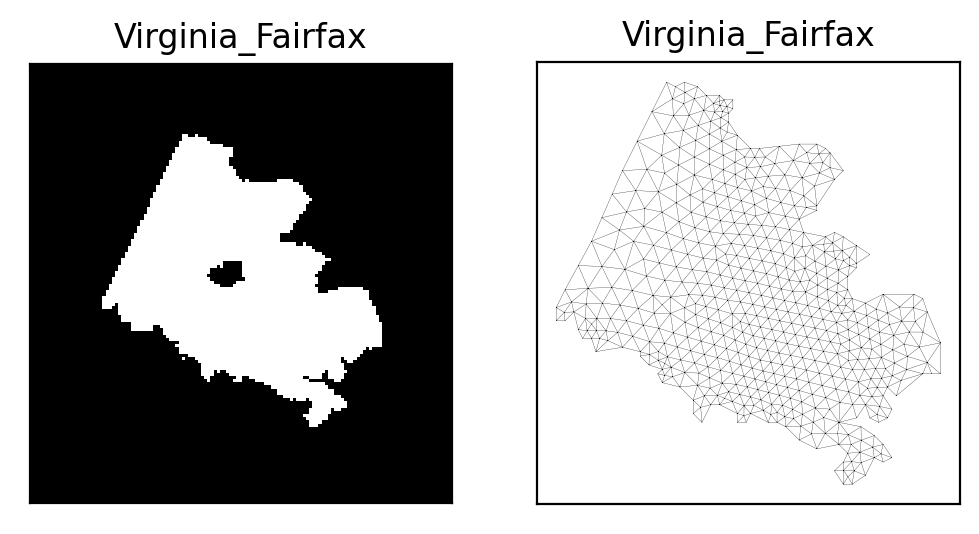

In [87]:
county = 'Virginia_Fairfax'

save_path = f'yearly/processed/{county}_mesh.xml'
load_path = f'yearly/processed/{county}.hdf5'

with h5py.File(load_path, 'r') as h5f:
    d = h5f['2010']
    mask = d['mask'][:].astype(bool)
    x_grid = d['x_grid'][:] / spatial_scale
    y_grid = d['y_grid'][:] / spatial_scale
    
    mask_float = np.zeros(mask.shape, dtype=np.uint8)
    mask_float[mask] = 255
    contours, _ = cv2.findContours(mask_float, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)

    '''
    countours is a list of lists -- you can change the index below here to get 
        different contours to choose as the mesh.
    '''
    idx = np.argmax([contours[i].squeeze().shape[0] for i in range(len(contours))])
    polygon = contours[idx].squeeze()
    print(mask.shape, polygon.shape)
    pos_x = x_grid[polygon[:, 1], polygon[:, 0]]
    pos_y = y_grid[polygon[:, 1], polygon[:, 0]]

    with pygmsh.geo.Geometry() as geom:
        geom.add_polygon(np.stack([pos_x, pos_y], axis=-1), mesh_size=4)
        mesh = geom.generate_mesh(dim=2, verbose=True)
    mesh.points = mesh.points[:, :2]
    mesh.write(save_path)
    
    print(mesh)
    
fig, ax = plt.subplots(1, 2, dpi=200)
ax[0].pcolormesh(x_grid, y_grid, mask, cmap='Greys_r')
ax[1].triplot(mesh.points[:, 0], mesh.points[:, 1], mesh.cells[1].data,
              color='black', linewidth=0.1)

for a in ax:
    a.set(xticks=[], yticks=[], title=county, aspect='equal');


In [90]:
from data_processing import *
from yearly_pbnn import *

model = SourcedOnlyPBNN()
dataset = YearlyDataset(county)
model.training_step(dataset[0])

Building dataset with constant housing in time


({'Si': tensor([ 0.1365,  0.1238,  0.1263,  ..., -0.1843, -0.1767, -0.1690],
         grad_fn=<ReshapeAliasBackward0>)},
 51.68405986592057)